In [12]:
import networkx as nx
import matplotlib.pyplot as plt
import igraph as ig
import numpy as np
import graph_tool as gt
import leidenalg
import matplotlib.image as mpimg
import pandas as pd
import cdlib
from sklearn.cluster import KMeans
from igraph import Graph, plot
from cdlib import algorithms, viz

## SBM graph generation

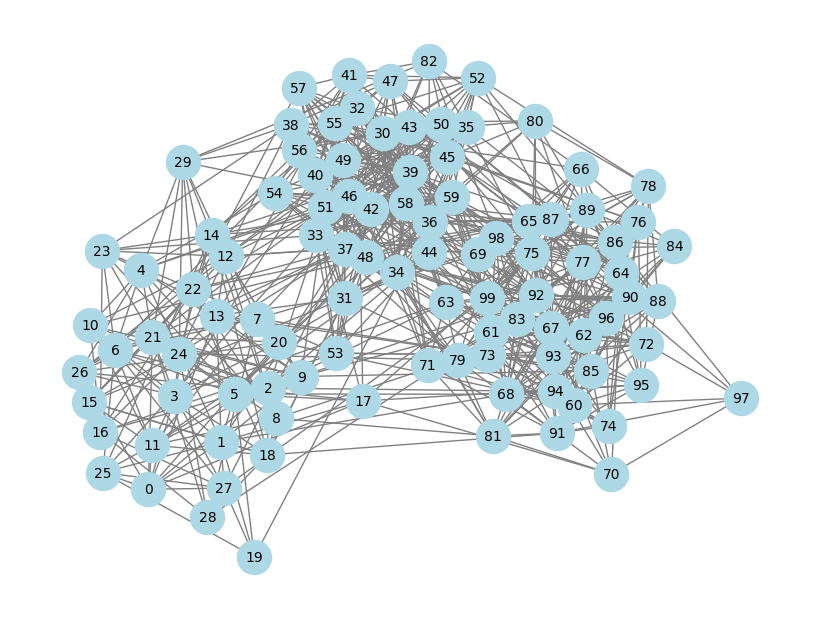

In [49]:
import networkx as nx

# Paramètres pour le SBM
sizes = [30, 30, 40]  # Tailles des trois blocs
probs = [
    [0.3, 0.05, 0.02],  # Probabilités de connexion entre les nœuds des blocs 1, 2 et 3
    [0.05, 0.5, 0.07],
    [0.02, 0.07, 0.30]
]

# Génération du graphe
G = nx.stochastic_block_model(sizes, probs)

# Visualisation du graphe
plt.figure(figsize=(8, 6))
nx.draw(G, with_labels=True, node_color='lightblue', edge_color='gray', node_size=600, font_size=10)
plt.show()



In [50]:
result = cdlib.algorithms.sbm_dl_nested(G)
num_communities = len(result.communities)
print(f"Nombre de communautés trouvées : {num_communities}")

pos = nx.spring_layout(G)


Nombre de communautés trouvées : 3


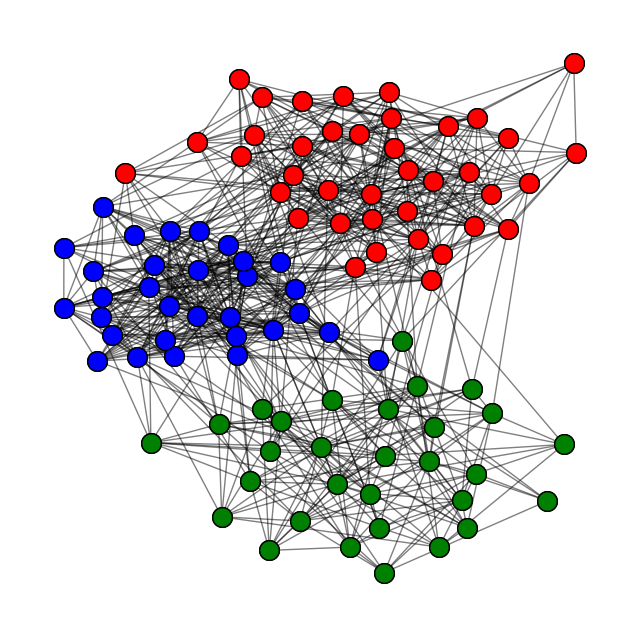

In [51]:
viz.plot_network_clusters(G, result, pos)


NameError: name 'pos' is not defined

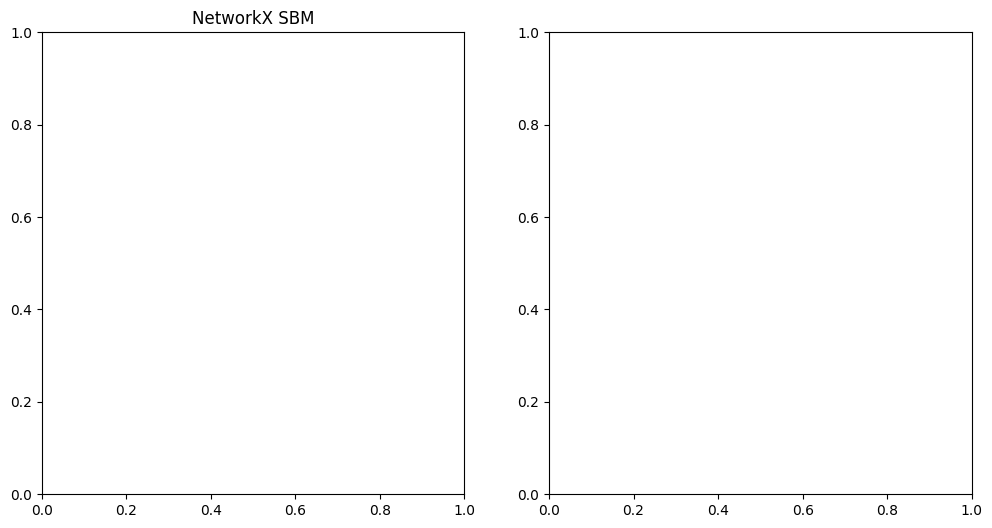

In [3]:
# Créer un SBM avec NetworkX
def networkx_sbm(sizes, probs):
    G = nx.stochastic_block_model(sizes, probs)
    return G

def igraph_sbm(sizes, probs):
    G = ig.Graph.SBM(90, probs, sizes)
    ig.plot(G, "igraph_plot.png")


# Préparer la figure matplotlib
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

sizes = [25, 30, 35]  # Taille des blocs
probs = [[0.8, 0.05, 0.05], [0.05, 0.8, 0.05], [0.05, 0.05, 0.8]]  # Probabilités de connexion intra et inter-blocs

colors = ['red', 'green', 'blue']

# Tracer le graphe NetworkX
networkx_graph = networkx_sbm(sizes, probs)
ax[0].set_title('NetworkX SBM')
for count, block in enumerate(range(3)):
    nodes = [n for n in networkx_graph.nodes if networkx_graph.nodes[n]['block'] == block]
    nx.draw_networkx_nodes(networkx_graph, pos, nodelist=nodes, node_color=colors[count], ax=ax[0])
nx.draw_networkx_edges(networkx_graph, pos, alpha=0.5, ax=ax[0])
ax[0].set_axis_off()

# Tracer le graphe igraph
igraph_sbm(sizes, probs)
ax[1].set_title('igraph SBM')
img = mpimg.imread('igraph_plot.png')
ax[1].imshow(img)
ax[1].axis('off')  # Masquer les axes

plt.tight_layout()
plt.show()


## Zachary's karate club directed graph

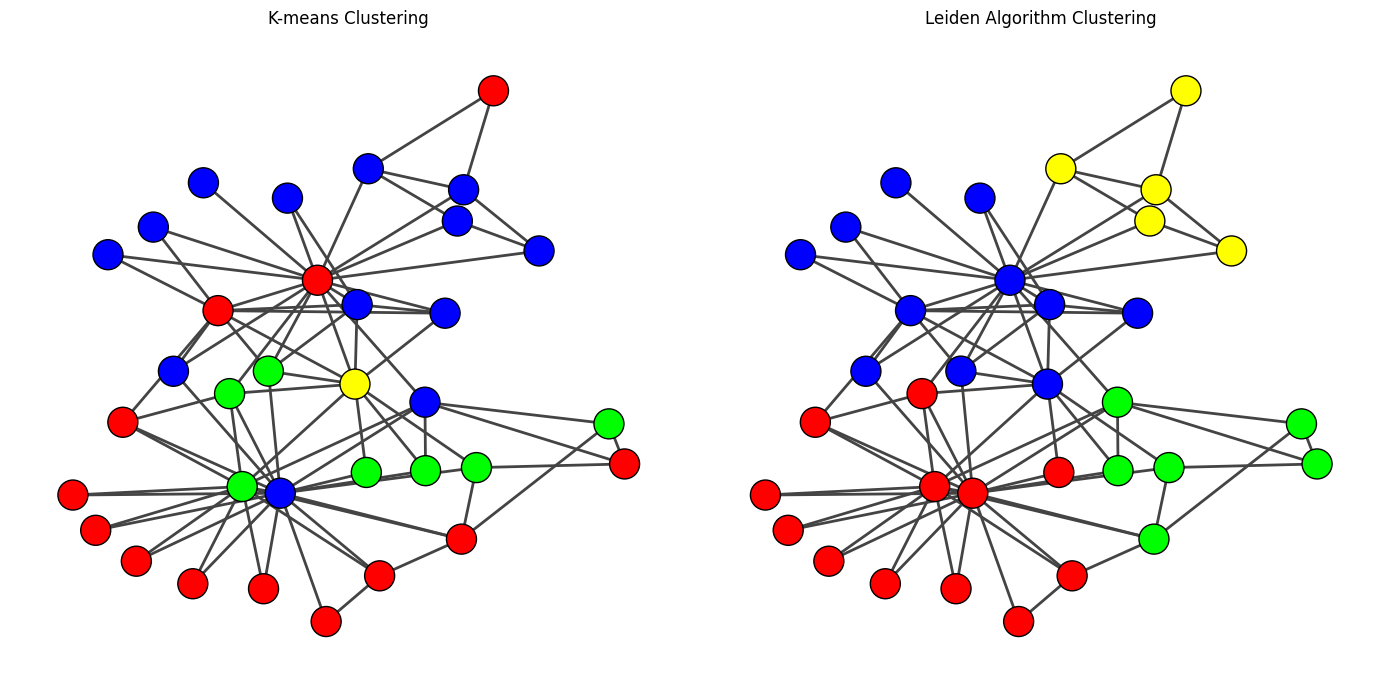

In [ ]:
# Charger le graphe de Zachary's Karate Club
g = ig.Graph.Famous("Zachary")

# Obtenir la matrice d'adjacence
A = np.array(g.get_adjacency().data)

# Calculer les vecteurs propres pour l'incorporation spectrale
eigenvalues, eigenvectors = np.linalg.eigh(A)

# Ignorer la première valeur propre et le vecteur propre correspondant (ils sont nuls)
X = eigenvectors[:, 1:3]  # Choisissez les deux premiers vecteurs propres significatifs

# Appliquer K-means sur l'incorporation spectrale avec 4 clusters
kmeans = KMeans(n_clusters=4, random_state=0).fit(X)
labels_kmeans = kmeans.labels_

# Définir les couleurs pour chaque cluster
colors = ['red', 'blue', 'green', 'yellow']
node_colors_kmeans = [colors[label] for label in labels_kmeans]
g.vs["color"] = node_colors_kmeans

# Appliquer l'algorithme de Leiden pour la partition de modularité
partition = leidenalg.find_partition(g, leidenalg.ModularityVertexPartition)
node_colors_leiden = [colors[part] for part in partition.membership]
g.vs["color"] = node_colors_leiden

# Créer une figure matplotlib avec 2 subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 7))

# Plot pour K-means
axes[0].set_title("K-means Clustering")
ig.plot(g, vertex_color=node_colors_kmeans, layout=g.layout('kk'), target=axes[0], mark_groups=False)

# Plot pour Leiden
axes[1].set_title("Leiden Algorithm Clustering")
ig.plot(g, vertex_color=node_colors_leiden, layout=g.layout('kk'), target=axes[1], mark_groups=False)

plt.tight_layout()
plt.show()


## Community Detection

### CD-LIB

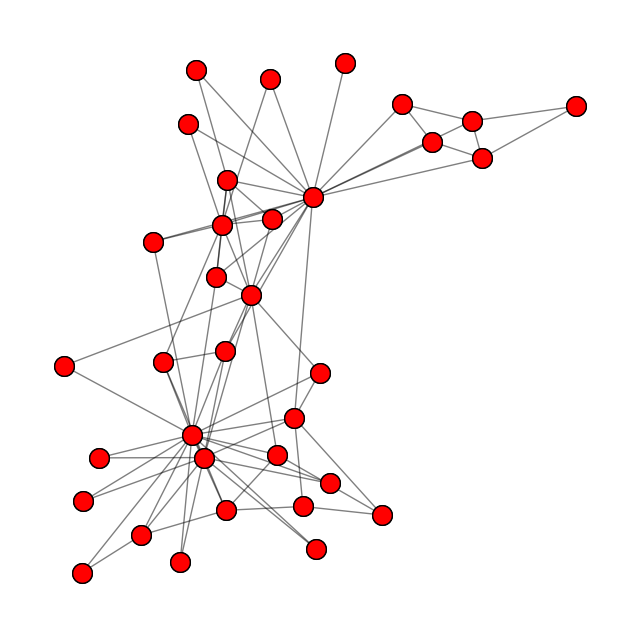

In [ ]:
G = nx.karate_club_graph()
coms = algorithms.sbm_dl_nested(G)
# coms = algorithms.sbm_dl(G)
pos = nx.spring_layout(G)
viz.plot_network_clusters(G, coms, pos)
plt.show()

In [ ]:
pd.DataFrame(coms.communities)

,0,1,2,3,4,5,6,7,8,9,...,24,25,26,27,28,29,30,31,32,33
0,0,1,2,3,4,5,6,7,8,9,...,24,25,26,27,28,29,30,31,32,33


### graph-tool

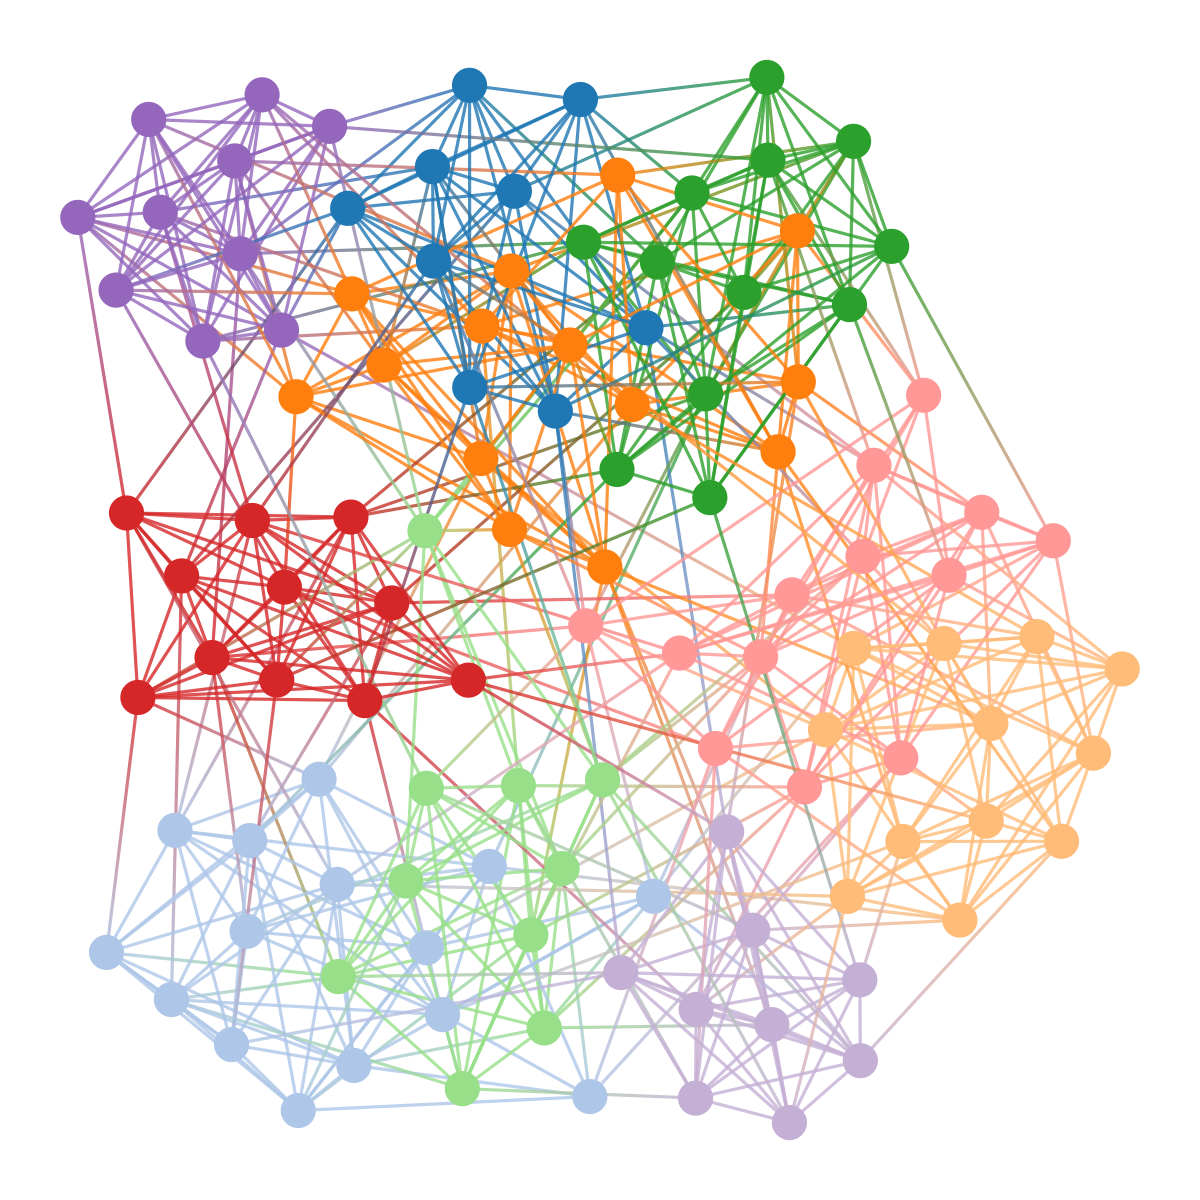

Nombre de blocs: 115
[ 25 110  65  53  25  53  65 109 109  25  53  25  13  65  13  65  25  28
  13  56  28 109 109  25  25 110  13  28  25  56  56  13  65 110  13  56
  13 110  13  65  53  25  13  13  66 110   0  65  66   0  25 109  53   0
  13  56  28  66  66  66  65  13  28  66  65  28  66   0 109  25  28  13
  53   0  53  66  28 109 109  56  56  53  56   0  53  13  66  28   0 110
  25  66  66  25  56  28  28  66  53  13  65  56  53 110  25 110  65  53
 109 110   0 109  66  28   0]


In [ ]:
g = gt.collection.data["football"]
state = gt.minimize_blockmodel_dl(g)

state.draw(pos=g.vp.pos)

nr = state.get_B()

# Afficher le nombre de blocs
print("Nombre de blocs:", nr)

# Afficher les blocs auxquels chaque sommet appartient
block_labels = state.get_blocks()
print(block_labels.a)



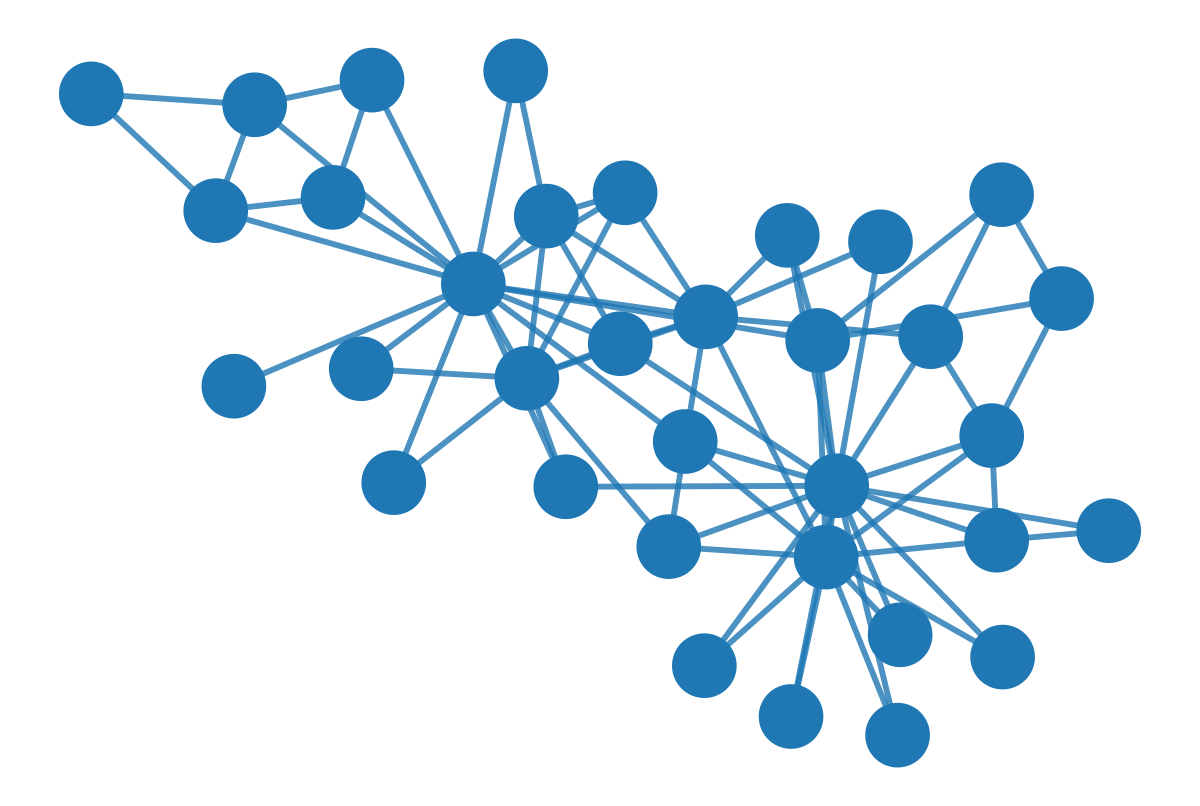

Nombre de blocs: 34
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [ ]:
g = gt.collection.data["karate"]
state = gt.minimize_blockmodel_dl(g)

state.draw(pos=g.vp.pos)

# Afficher le nombre de blocs
print("Nombre de blocs:", state.get_B())

# Afficher les blocs auxquels chaque sommet appartient
block_labels = state.get_blocks()
print(block_labels.a)
